# `opencadd.databases.klifs`: Quick start

## Module scope

Work with KLIFS data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import opencadd.databases.klifs as klifs

## Remote data

### Kinases

In [3]:
klifs.remote.kinases.kinase_groups()

['AGC', 'CAMK', 'CK1', 'CMGC', 'Other', 'STE', 'TK', 'TKL']

In [4]:
klifs.remote.kinases.kinase_families(kinase_group='CMGC')

['CDK', 'CDKL', 'CK2', 'CLK', 'DYRK', 'GSK', 'MAPK', 'RCK', 'SRPK']

In [5]:
# Or get all kinase families
klifs.remote.kinases.kinase_families()[:2]

['A6', 'ABC1']

In [6]:
len(klifs.remote.kinases.kinase_families())

144

In [7]:
print(len(klifs.remote.kinases.kinase_names()))
klifs.remote.kinases.kinase_names().head()

1127


,kinase_ID,name,full_name,species
0,813,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
1,815,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
2,814,4921509C19Rik,RIKEN cDNA 4921509C19 gene,Mouse
3,531,Aak1,AP2 associated kinase 1,Mouse
4,277,AAK1,AP2 associated kinase 1,Human


In [8]:
klifs.remote.kinases.kinases_from_kinase_names(kinase_names='Aak1')

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...
1,277,AAK1,AAK1,NAK,Other,BIKE,Human,AP2 associated kinase 1,Q2M2I8,1921,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...


In [9]:
klifs.remote.kinases.kinases_from_kinase_names(kinase_names=['Aak1', 'EGFR'])

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...
1,277,AAK1,AAK1,NAK,Other,BIKE,Human,AP2 associated kinase 1,Q2M2I8,1921,EVLAEGGFAIVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...
2,406,EGFR,EGFR,EGFR,TK,,Human,epidermal growth factor receptor,P00533,1797,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...
3,663,EGFR,Egfr,EGFR,TK,,Mouse,epidermal growth factor receptor,Q01279,0,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...


In [10]:
klifs.remote.kinases.kinases_from_kinase_ids(kinase_ids=533)

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,533,ACK,Tnk2,Ack,TK,,Mouse,"tyrosine kinase, non-receptor, 2",O54967,0,EKLGDGSFGVVRRVAVKCLDFIREVNAMHSLDRNLIRLYGVKMVTE...


In [11]:
klifs.remote.kinases.kinases_from_kinase_ids(kinase_ids=[533, 531])

,kinase_ID,name,HGNC,family,group,kinase_class,species,full_name,uniprot,iuphar,pocket
0,533,ACK,Tnk2,Ack,TK,,Mouse,"tyrosine kinase, non-receptor, 2",O54967,0,EKLGDGSFGVVRRVAVKCLDFIREVNAMHSLDRNLIRLYGVKMVTE...
0,531,AAK1,Aak1,NAK,Other,,Mouse,AP2 associated kinase 1,Q3UHJ0,0,EVLAEGGFALVFLCALKRMVCKREIQIMRDLSKNIVGYIDSLILMD...


### Ligands

In [12]:
klifs.remote.ligands.ligands_from_kinase_ids(kinase_ids=[33, 40])

,kinase_id,ligand_ID,PDB-code,Name,SMILES,InChIKey
0,33,920,LW4,3-(1H-indol-3-yl)-4-[2-(4-methylpiperazin-1-yl...,O=C1NC(=O)C(=C1c2nc(nc3c2cccc3)N4CCN(CC4)C)C=5...,OAVGBZOFDPFGPJ-UHFFFAOYSA-N
1,33,921,3KZ,"(1R)-9-[(3S,4S)-1,3-dimethylpiperidin-4-yl]-8-...",Fc1c(c2c(cc3N4C(=NNC(=O)[C@H]4C)COc3c2)[C@@H]5...,BLWOBXIQFDYTRF-OAGGEKHMSA-N
0,40,26,ADP,ADENOSINE-5&apos;-DIPHOSPHATE,P(=O)(OP(=O)(O)O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c...,XTWYTFMLZFPYCI-KQYNXXCUSA-N
1,40,63,ATP,ADENOSINE-5&apos;-TRIPHOSPHATE,P(=O)(OP(=O)(OC[C@H]1O[C@@H](N2c3ncnc(N)c3N=C2...,ZKHQWZAMYRWXGA-KQYNXXCUSA-N
2,40,64,ANP,PHOSPHOAMINOPHOSPHONIC ACID-ADENYLATE ESTER,P(=O)(OP(=O)(O)NP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,PVKSNHVPLWYQGJ-KQYNXXCUSA-N
3,40,160,ACP,PHOSPHOMETHYLPHOSPHONIC ACID ADENYLATE ESTER,P(=O)(OP(=O)(O)CP(=O)(O)O)(OC[C@H]1O[C@@H](N2c...,UFZTZBNSLXELAL-IOSLPCCCSA-N
4,40,677,BI1,3-{1-[3-(DIMETHYLAMINO)PROPYL]-1H-INDOL-3-YL}-...,O=C1NC(=O)C(C=2c3c(NC2)cccc3)=C1C=4c5c(N(C4)CC...,QMGUOJYZJKLOLH-UHFFFAOYSA-N
5,40,1028,C58,"(2S)-3-phenyl-N~1~-[2-(pyridin-4-yl)-5,6,7,8-t...",S1c2nc(nc(NC[C@@H](N)Cc3ccccc3)c2C4=C1CCCC4)c5...,NRHASZRDWOUMFD-SFHVURJKSA-N
6,40,3444,AFU,2-amino-5-[3-(piperazin-1-yl)phenyl]-N-(pyridi...,c1cc(cc(c1)N2CCNCC2)c3cc(c(nc3)N)C(=O)Nc4ccncc4,YDMJAALVMGFGRY-UHFFFAOYSA-N


In [13]:
klifs.remote.ligands.structures_from_ligand_ids(ligand_ids=[101, 920]).columns

Index(['ligand_id', 'structure_ID', 'kinase', 'species', 'kinase_ID', 'pdb',
       'alt', 'chain', 'rmsd1', 'rmsd2', 'pocket', 'resolution',
       'quality_score', 'missing_residues', 'missing_atoms', 'ligand',
       'allosteric_ligand', 'DFG', 'aC_helix', 'Grich_distance', 'Grich_angle',
       'Grich_rotation', 'front', 'gate', 'back', 'fp_I', 'fp_II', 'bp_I_A',
       'bp_I_B', 'bp_II_in', 'bp_II_A_in', 'bp_II_B_in', 'bp_II_out',
       'bp_II_B', 'bp_III', 'bp_IV', 'bp_V'],
      dtype='object')

### Interactions

#### Interaction types

In [14]:
klifs.remote.interactions.interaction_types()

,position,name
0,1,Apolar contact
1,2,Aromatic face-to-face
2,3,Aromatic edge-to-face
3,4,Hydrogen bond donor (protein)
4,5,Hydrogen bond acceptor (protein)
5,6,Protein cation - ligand anion
6,7,Protein anion - ligand cation


#### Interaction fingerprints by structure IDs

In [15]:
klifs.remote.interactions.interaction_fingerprint_from_structure_ids(structure_ids=[33, 34, 35])

,structure_ID,IFP
0,33,0000000000000010000001000000000000000000000000...
1,34,0000000000000010000000000000000000000000000000...
2,35,0000000000000010000001000000000000000000000000...


#### KLIFS pocket numbering

In [16]:
klifs.remote.interactions.klifs_pocket_numbering_from_structure_id(structure_id=33)

,index,Xray_position,KLIFS_position
0,1,367,I.1
1,2,368,I.2
2,3,369,I.3
3,4,370,g.l.4
4,5,371,g.l.5
...,...,...,...
80,81,500,xDFG.81
81,82,_,xDFG.82
82,83,_,xDFG.83
83,84,_,a.l.84


### Structures

#### ... by KLIFS structure ID(s)

In [17]:
klifs.remote.structures.structures_from_structure_ids(structure_ids=33).columns

Index(['structure_ID', 'kinase', 'species', 'kinase_ID', 'pdb', 'alt', 'chain',
       'rmsd1', 'rmsd2', 'pocket', 'resolution', 'quality_score',
       'missing_residues', 'missing_atoms', 'ligand', 'allosteric_ligand',
       'DFG', 'aC_helix', 'Grich_distance', 'Grich_angle', 'Grich_rotation',
       'front', 'gate', 'back', 'fp_I', 'fp_II', 'bp_I_A', 'bp_I_B',
       'bp_II_in', 'bp_II_A_in', 'bp_II_B_in', 'bp_II_out', 'bp_II_B',
       'bp_III', 'bp_IV', 'bp_V'],
      dtype='object')

In [18]:
klifs.remote.structures.structures_from_structure_ids(structure_ids=33)

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,33,ITK,Human,474,1snu,,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False


In [19]:
klifs.remote.structures.structures_from_structure_ids(structure_ids=[33, 34])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,33,ITK,Human,474,1snu,,B,0.746,2.124,QEIGSGQFGLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False
1,34,ITK,Human,474,4mf1,B,A,0.845,2.053,QEIGSG__GLVHLVAIKTIDFIEEAEVMMKLSPKLVQLYGVCLVFE...,...,False,False,False,False,False,False,False,False,False,False


#### ... by KLIFS kinase ID(s)

In [20]:
klifs.remote.structures.structures_from_kinase_ids(kinase_ids=22)

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7085,MASTL,Human,22,5loh,B,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
1,7086,MASTL,Human,22,5loh,A,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
2,7087,MASTL,Human,22,5loh,B,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
3,7088,MASTL,Human,22,5loh,A,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False


In [21]:
klifs.remote.structures.structures_from_kinase_ids(kinase_ids=[22, 23])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7085,MASTL,Human,22,5loh,B,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
1,7086,MASTL,Human,22,5loh,A,A,0.827,1.960,KPIS____GKVYLYAVKVV________LALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
2,7087,MASTL,Human,22,5loh,B,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False
3,7088,MASTL,Human,22,5loh,A,B,0.820,2.175,KPISRGAFGKVYLYAVKVV_________ALSKPFIVHLYYSYLVME...,...,False,False,False,False,False,False,False,False,False,False


#### ... by PDB ID

In [22]:
klifs.remote.structures.structures_from_pdb_ids(pdb_ids='3w32')

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,784,EGFR,Human,406,3w32,,A,0.83,2.177,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False


In [23]:
klifs.remote.structures.structures_from_pdb_ids(pdb_ids=['3w32', '3poz'])

,structure_ID,kinase,species,kinase_ID,pdb,alt,chain,rmsd1,rmsd2,pocket,...,bp_I_A,bp_I_B,bp_II_in,bp_II_A_in,bp_II_B_in,bp_II_out,bp_II_B,bp_III,bp_IV,bp_V
0,7308,EGFR,Human,406,3poz,,A,0.815,2.155,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False
1,784,EGFR,Human,406,3w32,,A,0.830,2.177,KVLGSGAFGTVYKVAIKELEILDEAYVMASVDPHVCRLLGIQLITQ...,...,True,True,True,True,False,False,False,False,False,False


### Coordinates

Load or download structural data from mol2 files.

#### Complex

Quick access to complex in mol2 format using `fetch` defaults.

In [24]:
klifs.remote.coordinates.fetch(33).head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,14.4725,33.9701,39.3798,N.4,1,ILE358,1.0,BACKBONE
1,2,H1,15.2804,34.1248,39.9658,H,1,ILE358,0.0,BACKBONE
2,3,H2,14.4008,34.7151,38.7016,H,1,ILE358,0.0,BACKBONE
3,4,H3,14.5688,33.0864,38.9002,H,1,ILE358,0.0,BACKBONE
4,5,CA,13.2420,33.9462,40.2248,C.3,1,ILE358,0.0,BACKBONE


In [25]:
klifs.remote.coordinates.fetch(33, input_format='pdb').keys()

Structural data keys: dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])


dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

#### Ligand

In [26]:
klifs.remote.coordinates.fetch(33, entity='ligand').head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,O4,1.9656,14.5986,41.0878,O.3,1,STU,-0.5600
1,2,C25,0.8220,14.3912,41.8995,C.3,1,STU,0.4556
2,3,H25,0.9939,13.7705,42.7788,H,1,STU,0.0800
3,4,C24,-0.2090,13.5993,41.0666,C.3,1,STU,-0.1600
4,5,H241,-1.1472,14.1541,41.0753,H,1,STU,0.0800


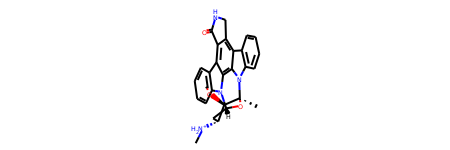

In [27]:
klifs.remote.coordinates.fetch(33, entity='ligand', output_format='rdkit', compute2d=False)

#### Protein

In [28]:
klifs.remote.coordinates.fetch(33, entity='protein').head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,14.4725,33.9701,39.3798,N.4,1,ILE358,1.0,BACKBONE
1,2,H1,15.2804,34.1248,39.9658,H,1,ILE358,0.0,BACKBONE
2,3,H2,14.4008,34.7151,38.7016,H,1,ILE358,0.0,BACKBONE
3,4,H3,14.5688,33.0864,38.9002,H,1,ILE358,0.0,BACKBONE
4,5,CA,13.2420,33.9462,40.2248,C.3,1,ILE358,0.0,BACKBONE


#### Pocket

In [29]:
klifs.remote.coordinates.fetch(33, entity='pocket').head()

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,7.2217,16.5654,51.5923,N.3,1,GLN367,0.0,BACKBONE
1,2,H,6.9393,17.3722,51.0544,H,1,GLN367,0.0,BACKBONE
2,3,CA,6.8224,15.2285,51.1651,C.3,1,GLN367,0.0,BACKBONE
3,4,HA,7.6298,14.5853,51.5151,H,1,GLN367,0.0,BACKBONE
4,5,C,6.7483,14.9679,49.6640,C.2,1,GLN367,0.0,BACKBONE


#### Water

In [30]:
try:
    klifs.remote.coordinates.fetch(33, entity='water')
except ValueError as e:
    print(e)

Entity water is not available remotely but we could ask Albert to add this.


## Local data

Get your personal copy of the KLIFS dataset here: https://klifs.vu-compmedchem.nl/search.php. 

Set the path to the `KLIFS_download` folder:

In [31]:
PATH_TO_KLIFS_DOWNLOAD = Path('../../opencadd/tests/databases/data/')

### Initialize

In [32]:
# Add test files and update paths
klifs_overview_path = PATH_TO_KLIFS_DOWNLOAD / 'KLIFS_download' / 'overview.csv'
klifs_export_path = PATH_TO_KLIFS_DOWNLOAD / 'KLIFS_download' / 'KLIFS_export.csv'

In [33]:
klifs.local.initialize.from_files(
    klifs_overview_path=klifs_overview_path,
    klifs_export_path=klifs_export_path
)

,species,kinase,pdb_id,alternate_model,chain,ligand_orthosteric_pdb_id,ligand_allosteric_pdb_id,rmsd1,rmsd2,qualityscore,...,bp_iv,bp_v,kinase_all,family,group,ligand_orthosteric_name,ligand_allosteric_name,dfg,ac_helix,filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,...,0,0,[BMX],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,HUMAN/BMX/3sxr_chainA
1,Human,BRAF,6uuo,-,A,QH1,-,0.806,2.028,5.2,...,0,0,[BRAF],RAF,TKL,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,HUMAN/BRAF/6uuo_chainA


In [34]:
klifs_metadata_path = Path(klifs_overview_path).parent / 'klifs_metadata.csv'
klifs_metadata = pd.read_csv(klifs_metadata_path)
klifs_metadata

,species,kinase,pdb_id,alternate_model,chain,ligand_orthosteric_pdb_id,ligand_allosteric_pdb_id,rmsd1,rmsd2,qualityscore,...,bp_iv,bp_v,kinase_all,family,group,ligand_orthosteric_name,ligand_allosteric_name,dfg,ac_helix,filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,...,0,0,['BMX'],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,HUMAN/BMX/3sxr_chainA
1,Human,BRAF,6uuo,-,A,QH1,-,0.806,2.028,5.2,...,0,0,['BRAF'],RAF,TKL,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,HUMAN/BRAF/6uuo_chainA


### Kinases

In [35]:
klifs.local.kinases.kinase_groups(klifs_metadata)

['TK', 'TKL']

In [36]:
klifs.local.kinases.kinase_families(klifs_metadata, kinase_group='TKL')

['RAF']

In [37]:
klifs.local.kinases.kinase_families(klifs_metadata)[:2]

['Tec', 'RAF']

In [38]:
len(klifs.local.kinases.kinase_families(klifs_metadata))

2

In [39]:
klifs.local.kinases.kinase_names(klifs_metadata).head()

,kinase,species
0,BMX,Human
1,BRAF,Human


In [40]:
klifs_metadata.head()

,species,kinase,pdb_id,alternate_model,chain,ligand_orthosteric_pdb_id,ligand_allosteric_pdb_id,rmsd1,rmsd2,qualityscore,...,bp_iv,bp_v,kinase_all,family,group,ligand_orthosteric_name,ligand_allosteric_name,dfg,ac_helix,filepath
0,Human,BMX,3sxr,-,A,1N1,-,0.839,1.967,6.4,...,0,0,['BMX'],Tec,TK,N-(2-CHLORO-6-METHYLPHENYL)-2-({6-[4-(2-HYDROX...,-,out-like,in,HUMAN/BMX/3sxr_chainA
1,Human,BRAF,6uuo,-,A,QH1,-,0.806,2.028,5.2,...,0,0,['BRAF'],RAF,TKL,1-[4-{[1-(3-{[dihydroxy(propyl)-lambda~4~-sulf...,-,in,out-like,HUMAN/BRAF/6uuo_chainA


In [41]:
klifs.local.kinases.kinases_from_kinase_names(klifs_metadata, kinase_names='BRAF')

In [42]:
klifs.local.kinases.kinases_from_kinase_ids(klifs_metadata, kinase_ids=[533, 531])

### Ligands

### Interactions

### Structures

### Coordinates

#### Example structure

In [43]:
species = 'human'
kinase_name = 'BRAF'
pdb_id = '6uuo'
alt = '-'
chain = 'A'

#### Complex

In [44]:
file_path = klifs.utils.file_path(PATH_TO_KLIFS_DOWNLOAD, species, kinase_name, pdb_id, alt, chain, 'complex', 'mol2', True)
file_path

PosixPath('../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/complex.mol2')

In [45]:
klifs.local.coordinates.load(file_path).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH901,0.0,None
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH901,0.0,None


#### Ligand

In [46]:
file_path = klifs.utils.file_path(PATH_TO_KLIFS_DOWNLOAD, species, kinase_name, pdb_id, alt, chain, 'ligand', 'mol2', True)
file_path

PosixPath('../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/ligand.mol2')

In [47]:
klifs.local.coordinates.load(file_path).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,C11,3.5395,20.5508,39.1755,C.ar,1,QH1,-0.0230
1,2,C13,2.1865,20.1689,41.3174,C.2,1,QH1,-0.3016


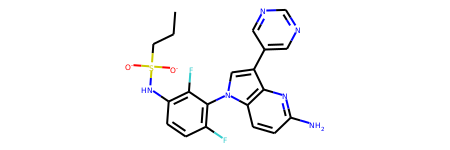

In [48]:
klifs.local.coordinates.load(file_path, 'rdkit')

#### Protein

In [49]:
file_path = klifs.utils.file_path(PATH_TO_KLIFS_DOWNLOAD, species, kinase_name, pdb_id, alt, chain, 'protein', 'mol2', True)
file_path

PosixPath('../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/protein.mol2')

In [50]:
klifs.local.coordinates.load(file_path).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,10.5459,36.4276,36.2952,N.4,1,TRP450,1.0,BACKBONE
1,2,H1,11.3045,36.9642,36.6910,H,1,TRP450,0.0,BACKBONE


#### Pocket

In [51]:
file_path = klifs.utils.file_path(PATH_TO_KLIFS_DOWNLOAD, species, kinase_name, pdb_id, alt, chain, 'pocket', 'mol2', True)
file_path

PosixPath('../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/pocket.mol2')

In [52]:
klifs.local.coordinates.load(file_path).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge,backbone
0,1,N,9.0135,18.2386,51.8602,N.3,1,GLN461,0.0,BACKBONE
1,2,H,8.2695,18.7862,52.2683,H,1,GLN461,0.0,BACKBONE


#### Water

In [53]:
file_path = klifs.utils.file_path(PATH_TO_KLIFS_DOWNLOAD, species, kinase_name, pdb_id, alt, chain, 'water', 'mol2', True)
file_path

PosixPath('../../opencadd/tests/databases/data/KLIFS_download/HUMAN/BRAF/6uuo_chainA/water.mol2')

In [54]:
klifs.local.coordinates.load(file_path).head(2)

,atom_id,atom_name,x,y,z,atom_type,subst_id,subst_name,charge
0,1,O,-29.7742,11.3869,19.8824,O.3,1,HOH,0.0
1,2,H1,-28.8142,11.3869,19.8824,H,1,HOH,0.0
